<a href="https://colab.research.google.com/github/trivedisunita/MLLearning/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part1---Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Upload Dataset

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Stock_Price_data_set_csv.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


#Data Exploration

In [3]:
#To check first five row from Dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
#To know basic information about Dataset that how many columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
#To know shape of dataset means how many rows and columns are there in whole dataset.
data.shape

(1009, 7)

In [6]:
#To know statistical summery about dataset we use this method
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [7]:
#To check any missing value in dataset
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#so we don't have any missing value in this dataset.now further move some visualization.


#Part2---Data Visualization

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


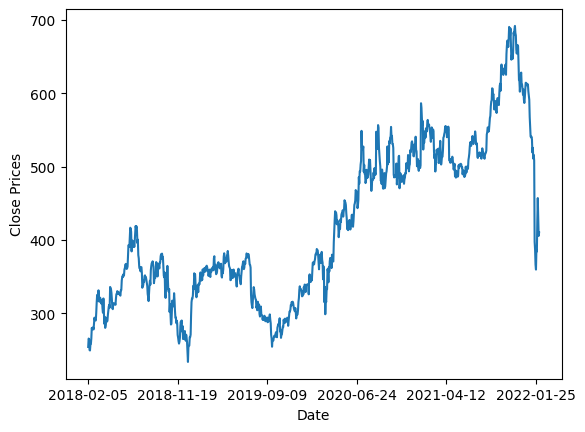

In [10]:
#plot a line chart of the close coloumn price over time
data.set_index('Date', inplace =True)

data['Close'].plot()
plt.ylabel('Close Prices')
plt.show()


In [11]:
#As we can see close price is going incresed with time.graph shows the incresed trending pattern.between the 2021
#and 2022 prices fall rapidly due to market low.

#Part3---Data PreProcessing

In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [13]:
#Feature Selection:--
#x is holding the value for open, high, low, close and adj close columns.
#y is holding the valu for close columns.
#volume is not selected for the selction as they are not needed


In [14]:
x = data.iloc[:, 0:5].values
y = data['Close']

In [15]:
x.shape

(1009, 5)

In [16]:
y.shape

(1009,)

#Divide the data for train and test purpose
#Import the libraries from scikit learn to train and test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#split the dataset into 80:20 ratio for training and testing purpose.
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [19]:
#to check both x_train and y_train data
x_train.shape

(807, 5)

In [20]:
y_train.shape

(807,)

#Part4---Feature Scaling

In [21]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [22]:
#To ormalize data on one scale we use standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
x_train  = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
x_train

array([[ 1.35570311,  1.36115225,  0.99829849,  0.9750038 ,  0.9750038 ],
       [ 0.81472356,  0.76838085,  0.8160432 ,  0.76047077,  0.76047077],
       [ 0.629714  ,  0.61744077,  0.67759926,  0.61527826,  0.61527826],
       ...,
       [-0.69217387, -0.74410833, -0.70905284, -0.73905814, -0.73905814],
       [-0.80155567, -0.75373506, -0.78145691, -0.74978922, -0.74978922],
       [-1.4209913 , -1.41807138, -1.38845155, -1.38650903, -1.38650903]])

In [25]:
x_test

array([[ 1.30571057,  1.28195889,  1.29806033,  1.32436523,  1.32436523],
       [ 1.14606227,  1.16707344,  1.00161879,  0.9772968 ,  0.9772968 ],
       [-0.64464437, -0.68607527, -0.64771701, -0.67494601, -0.67494601],
       ...,
       [-0.41438572, -0.43487191, -0.49396213, -0.47912392, -0.47912392],
       [ 0.10606763,  0.05908934,  0.01821555,  0.03450764,  0.03450764],
       [ 0.73544675,  0.71897564,  0.65103571,  0.59308191,  0.59308191]])

#Part5--- Building the Model

In [26]:
# Multiclass Linear Regression
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
model_lr = lr.fit(x_train,y_train)
model_lr

LinearRegression()

In [29]:
y_pred = lr.predict(x_test)

#Import all necessary regression matrics to check accurecy score of our model

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test, y_pred)

1.0

#Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfr = RandomForestRegressor()
model_rfr = rfr.fit(x_train, y_train)


In [34]:
model_rfr

RandomForestRegressor()

In [35]:
y_pred = rfr.predict(x_test)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999064123311381

USING XGBoost Regression

In [37]:
from xgboost import XGBRFRegressor
xgr = XGBRFRegressor()
xgr.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [38]:
y_pred = xgr.predict(x_test)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.999574038122678

#Based upon above observation we can say that multilinear regression perform better then other two random forest and XGboost.

#Hyper Parameter Tuning
to avoid overfitting problem i used random serach cross validation process to tune hyperparameter.

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
parameters = {
    'n_estimators': [20, 50, 100, 500,1000],
    'max_depth': np.arange(1,15,1),
    'min_samples_split':[2,5,10],
    'min_samples_leaf' : np.arange(1,2,4, dtype= int),
    'max_features': ['auto','sqrt'],
    'bootstrap': [True, False]
}

In [42]:
parameters

{'n_estimators': [20, 50, 100, 500, 1000],
 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': array([1]),
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}

In [45]:
random_cv = RandomizedSearchCV(estimator=model_rfr, param_distributions=parameters, n_iter=50, cv=3, verbose=2,
                               n_jobs =-1, random_state=42)

In [46]:
best_param= random_cv.fit(x_train, y_train)

print(best_param)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([1]),
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 50, 100, 500,
                                                         1000]},
                   random_state=42, verbose=2)


In [47]:
best_parameters = best_param.best_params_
print(best_parameters)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 12, 'bootstrap': True}


In [48]:
#Apply best parameters to model and predict
model_rfr = RandomForestRegressor(n_estimators=1000, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=12,bootstrap=True)
model_rfr.fit(x_train, y_train)
predict = model_rfr.predict(x_test)
print(predict)
print(predict.shape)

[562.25308746 525.67086796 345.53640178 288.32351927 525.49759003
 335.07311405 288.79171021 286.13391091 307.20841371 310.63054479
 361.05120298 345.72210357 391.4087344  493.48939159 288.29033022
 357.11092062 425.11700554 325.96055607 414.03646218 480.14457139
 369.07439479 361.41588405 307.5251297  488.57435357 298.70869887
 547.51347917 604.80214662 533.62349458 494.86106573 604.48067743
 358.18854226 424.99910489 520.570774   321.17355872 260.22758361
 298.90222276 488.87317827 532.64063874 605.61806938 522.6221786
 499.94599315 427.03753423 248.97221976 329.42083624 301.05664716
 419.7793559  351.20927049 501.91484928 278.41775997 499.10297978
 282.70562528 361.39426471 502.25104867 477.09120406 506.2071913
 386.72168606 665.03212124 453.69812065 332.74513794 397.62779604
 461.02593383 311.75153815 302.08824939 378.80436294 470.44582352
 558.37157909 387.7329824  588.02795972 265.90535798 390.70251612
 291.29466887 379.28637811 476.08882418 686.41751649 359.97002622
 436.6581499

In [54]:
predict.shape

(202,)

In [50]:
#performance evalution
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(r2_score(y_test, predict), 4))

Root Mean Squared Error: 0.9413
(R^2) Score: 0.9999


In [52]:
print(f'Train Score : {model_rfr.score(x_train, y_train) * 100:.2f}% and Test Score : {model_rfr.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')

Train Score : 100.00% and Test Score : 99.99% using Random Tree Regressor.


In [53]:
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.9 %.


#collect future prediction and plot graph .
#i extracted the future days from prediction that held 202 days.Dates and prices for are converted in csv file

In [61]:
predictions = pd. DataFrame({'Predictions': predict},
                            index= pd.date_range(start = '2023-04-04' ,periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#colllects future days from predicted values

oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")

onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")

fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

To figure out the buy, sell and hold prices, investors seek to profit by selling at the highest price, buying at the lowest price, and holding price if neither is happening. For example; an investor buys a stock at the lowest point for 5 dollars and it has been predicted that in 21 days, the price would reach 20 dollars, that investor will hold their stock until the 21st day for selling to profit. So, the maximum price in this context is the selling price and the minimum is the buy price.

Buy price and date
   Unnamed: 0  Predictions
3  2023-04-07   288.323519
Sell price and date
   Unnamed: 0  Predictions
0  2023-04-04   562.253087


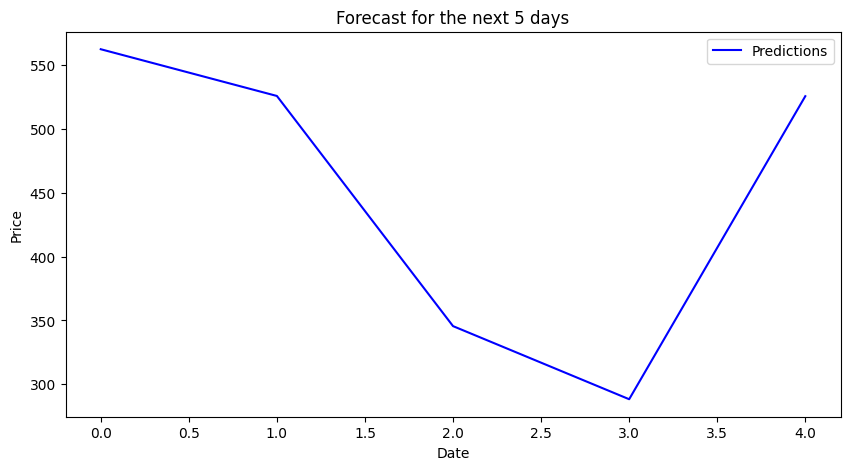

In [65]:
#Five days prediction
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")

buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#Conclusion

However because of how fickle the stock market is, there are no perfect or accurate prediction systems.
random forest is mostly fast, simple, and flexible algorithm.algorithm shows first two days the prices will be high then next two days price falls and then again rise.